# Effects of Loan Characterics on Borrower's APR
## by Mahmoud Essam Sharshira

## Investigation Overview

> In this presentation. Many visualizations on loans's characterics will be created to study their relationship on borrowers's APR. The main characterics are BorrowerAPR, ProsperScore, AvailableBankcardCredit and CreditScoreRangeUpper.


## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, debt, etc. Variables with many missing values were dropped to make the Dataset more accurate. Outliers were also removed to provide more reliable Data.
This study will be analyzing factors that could inflence borrow's APR and which loans were taken by what type of borrowers.


In [1]:
# Importing pacakages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignoring warnings

import warnings
warnings.simplefilter("ignore")

In [2]:
# Increasing number of columns to be displayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

# loading the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')

In [3]:
# data wrangling


# filtering out loans without ProsperScores

df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

# Decided to remove any unuseful columns or columns that have huge amount of null values!

df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

# Remove fewer people who has high Creditavailible

High_Creditavailible = df_loan_2[df_loan_2['AvailableBankcardCredit'] > 150000]
df_loan_3 = df_loan_2.drop(High_Creditavailible.index)



## Distribution of BorrowerAPR

> Observe the counts for all BorrowerAPR values, the lowest APR is at around 0.05% and the highest is at around 0.41%. Two high counts are found at 0.35797% and 0.35643%. 

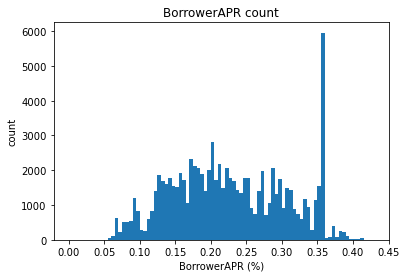

In [4]:

bins = np.arange(0, df_loan_2['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.05));


## BorrowerAPR vs. ProsperScore

> A PerosperScore was given to each borrowers. The higher the score, the better rating the borrower were received. The plot shows the negative correlation between BorrowerAPR and ProsperScore. The plot explain the higher the APR, the lower the ProsperScore is. This makes sense because borrowers with higher rating tend to received lower interest rate and APR.

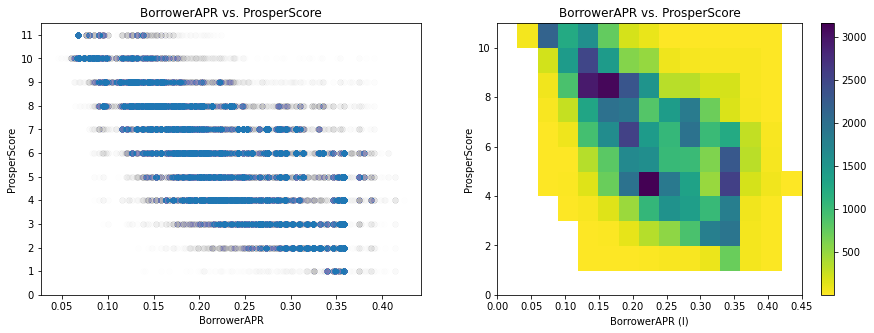

In [5]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

## BorrowerAPR vs ProsperScore on each ProsperRatings

>This visualization helps to analyze BorrowerAPR vs ProsperScore on different letter ratings. The patterns shows the lowest rating(HR) of borrowers have the highest APR percentage, and borrowers with high rating (AA) has the lowest APR percentage. This visualization differentiate groups of people in terms of APR received.


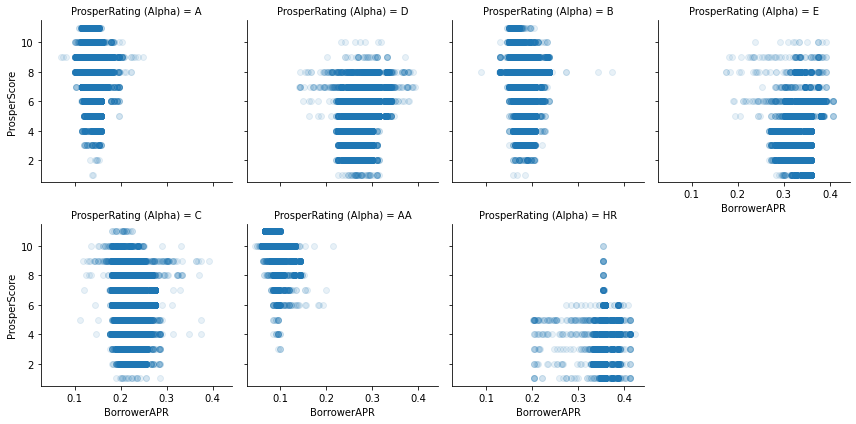

In [6]:
g = sb.FacetGrid(data = df_loan_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

In [9]:
!jupyter nbconvert slide_deck_Loan_Data_From_Prosper.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_Loan_Data_From_Prosper.ipynb to slides
[NbConvertApp] Writing 704576 bytes to slide_deck_Loan_Data_From_Prosper.slides.html
